In [2]:
%matplotlib inline

# k-space and Fourier Transforms

Let's define and plot a wave in 1 dimension where we track the amplitude at a single point in space as a function of time. The simplest such wave would be a **sinusoidal wave**:

$y = A_0\cos(2\pi f~ t)$

Let's import the standard libraries and plot the amplitude for 3 seconds.

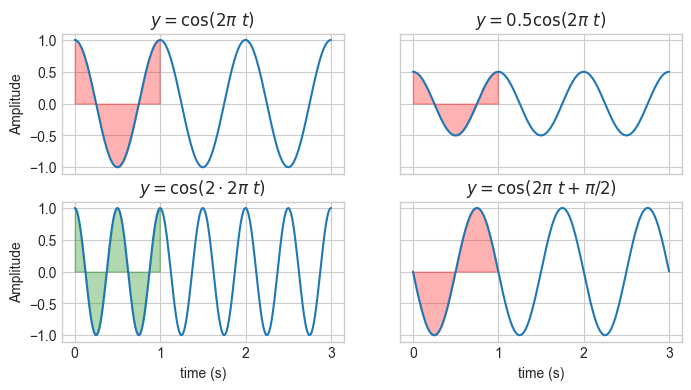

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams, rcParamsDefault, gridspec
import numpy as np
rcParams.update(rcParamsDefault)

plt.style.use(['seaborn-v0_8-whitegrid'])
    
t = np.linspace(0, 3, 200)
t_1 = t[t <= 1] 
y_0 = np.cos(2*np.pi*t)
y_1 = 0.5*np.cos(2*np.pi*t)
f = 2 # Frequency is 2 Hz
y_2 = np.cos(f*2*np.pi*t)
phi = np.pi/2
y_3 = np.cos(2*np.pi*t+phi)

fig, ax = plt.subplots(2,2, figsize=(8,4), sharey='row', sharex='col')

ax[0, 0].plot(t, y_0)
ax[0, 0].fill_between(t_1, y_0[:len(t_1)], color='red', alpha=0.3)
ax[0, 0].set_ylabel('Amplitude')
ax[0, 0].set_title(r'$y = \cos(2\pi~t)$')


ax[0, 1].plot(t, y_1)
ax[0, 1].fill_between(t_1, y_1[:len(t_1)], color='red', alpha=0.3) 
ax[0, 1].set_title(r'$y = 0.5\cos(2\pi~t)$')

ax[1, 0].plot(t, y_2)
ax[1, 0].fill_between(t_1, y_2[:len(t_1)], color='green', alpha=0.3)
ax[1, 0].set_title(r'$y = \cos(2\cdot 2\pi~t)$')
ax[1, 0].set_ylabel('Amplitude')
ax[1, 0].set_xlabel('time (s)')

ax[1, 1].plot(t, y_3)
ax[1, 1].fill_between(t_1, y_3[:len(t_1)], color='red', alpha=0.3)
ax[1, 1].set_title(r'$y = \cos(2\pi~t + \pi/2)$')
ax[1, 1].set_xlabel('time (s)')
plt.show()

It's clear that for wave 1, 2, and 4 the amplitude takes 1 second to complete one period. That is, the *frequency* of these waves are *f* = 1 s $^{-1}$ or 1 Hz (and that *f* = 2 Hz for the 3rd wave). But it is also clear that looking at it from an angular view that the *angular frequency*, $\omega$, for those same waves are: $\omega = 2\pi$ radians per seconds, and $4\pi$ radians / sec for the 3rd wave.
$$y(t)|_{dx=0} = A_0\cos(2\pi~ f~t + \phi) = A_0\cos(\omega~t + \phi)$$

If we instead take a snapshot in time and looked at the spatial variation of the amplitude *of wave 1 and 3 from before* it could look as follows:

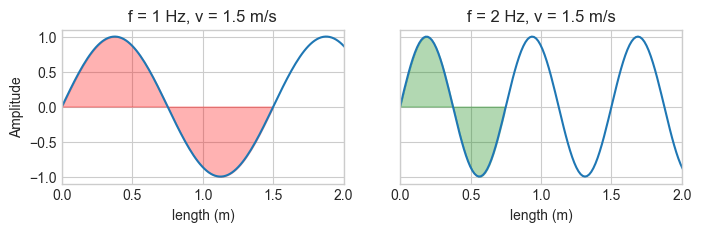

In [4]:
x = np.linspace(0, 3, 200)
x_1 = x[x <= 1.5]
x_2 = x[x <= 1.5/2]
f = 1 # frequency is 1 Hz
v = 1.5 # speed of wavefront is 1.5 m/s

y_0 = np.sin((f/v)*2*np.pi*x)

f = 2 # freq is 2 Hz
y_2 = np.sin((f/v)*2*np.pi*x)

fig, ax = plt.subplots(1,2, figsize=(8,2), sharey=True)

ax[0].plot(x, y_0)
ax[0].fill_between(x_1, y_0[:len(x_1)], color='red', alpha=0.3)
ax[0].set_ylabel('Amplitude')
ax[0].set_title('f = 1 Hz, v = 1.5 m/s')
ax[0].set_xlabel('length (m)')
ax[0].set_xlim(0, 2)


ax[1].plot(x, y_2)
ax[1].fill_between(x_2, y_2[:len(x_2)], color='green', alpha=0.3)
ax[1].set_title('f = 2 Hz, v = 1.5 m/s')
ax[1].set_xlabel('length (m)')
ax[1].set_xlim(0, 2)
plt.show()

We can see that the wavelength, $\lambda$ is related to the frequency, $f$, and speed $v$ by:
$$\lambda = \frac{v}{f}$$
such that:
$$y(x)|_{dt=0} = A_0\cos(2\pi\frac{f}{v}~x) = A_0\cos(\frac{2\pi}{\lambda} x) $$ 


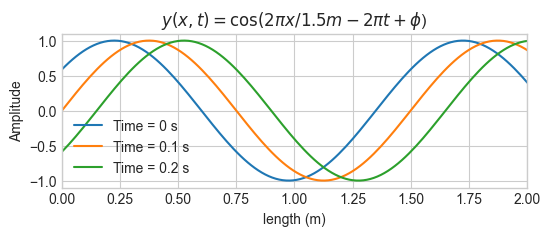

In [5]:
rcParams.update(rcParamsDefault)

plt.style.use(['seaborn-v0_8-whitegrid'])
x = np.linspace(0, 3, 200)
x_1 = x[x <= 1.5]
f = 1 # frequency is 1 Hz
v = 1.5 # speed of wavefront is 1.5 m/s

y_0 = np.sin((f/v)*2*np.pi*x + np.pi/5)

y_2 = np.sin((f/v)*2*np.pi*x - 2*np.pi*f*0.1 + np.pi/5)
y_3 = np.sin((f/v)*2*np.pi*x - 2*np.pi*f*0.2 + np.pi/5)

fig, ax = plt.subplots(figsize=(6,2))


ax.plot(x, y_0, label='Time = 0 s')
ax.plot(x, y_2, label='Time = 0.1 s')
ax.plot(x, y_3, label='Time = 0.2 s')
plt.legend()
ax.set_ylabel('Amplitude')
ax.set_title(r'$y(x, t) = \cos(2\pi x/1.5 m - 2\pi t + \phi$)')
ax.set_xlabel('length (m)')
ax.set_xlim(0, 2)

plt.show()

## The wavenumber, *k*.
Let us now introduce the *wavenumber*, $k = \frac{2\pi}{\lambda} = \frac{2\pi f}{v} = \frac{\omega}{v} $, then we can rewrite the wavefunction into the following form:
$$y(x)|_{dt=0} = A_0\cos(\frac{2\pi}{\lambda} x) =A_0\cos(k x), $$

Combining both we get the total one-dimensional wavefunction as a function of position and time
:
$$y(x, t) = A_0\cos(\frac{2\pi}{\lambda} x - 2\pi f t + \phi) = A_0\cos( k x - \omega t + \phi )$$

Observe the minus sign in front of the $\omega t $ factor. Essentially, if you look at a wave front traveling in positive *x* then you need to have a minus sign. 

Looking at $k$ it is clear that it has to have the dimension of inverse length, for example $k = 5.07$ nm $^{-1}$ for 1 keV X-ray. For this reason one often see people refer to *k* as the *spatial frequency*, in units of *cycles per length* (e.g. 2.5 cyc $\cdot$ cm $^{-1}$), in a similar way as the "normal" frequency has the unit of s $^{-1}$.

The code below creates a interactive widget where you can play around with the effects of Amplitude, phase and wavenumber. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

from IPython.display import display

def interact_cos():
    ## Plot parameters
    xmin, xmax, nx = 0.0, 4.0*np.pi, 200
    ymin, ymax     = -5.0, 5.0

    ## Set up the figure and the comparison plot of y=cos(x).
    fig = plt.figure(figsize=(8,3))
    x   = np.linspace(xmin, xmax, nx)
    line, = plt.plot([], [], color='k', linewidth=2, label=r"$y=A \cos(kx + \phi)$")
    

    ## Set up the figure axes, etc.
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc="upper left")
    plt.close()

    ## Callback function: plot y=Acos(x+phi)
    def plot_cos(phi, A, k):
        y = A*np.cos(k*x + phi)
        line.set_data(x, y)
        display(fig)

    interact(plot_cos,
             phi = FloatSlider(min=-3.2, max=3.2, step=0.2, value=0.0, description="phase"),
             A   = FloatSlider(min=-5.0, max=5.0, step=0.2, value=1.2, description="amplitude"),
             k   = FloatSlider(min=0.5, max=3.5, value=0.5, description="k"))
    
interact_cos()

interactive(children=(FloatSlider(value=0.0, description='phase', max=3.2, min=-3.2, step=0.2), FloatSlider(va…

## Fourier Series
So far we have looked at individual waves or sinusoidal functions. What happens if we add multiple such waves? Take a look at the formula below:

$$\text{object}(x) = f(x)|_t =  \frac{A_0}{2} + \sum_{n = 1}^{\infty} A_n \cos(\frac{2\pi n}{P}x - \phi_n), \quad \{ n \in \mathbb{N} \}$$

What does it mean? 

It says that some real valued function - we use 1D variable *x* to represent this here - like the temperature distribution in some component, or the positions of atoms in a crystal and so on, at some arbitrary time can be written as a sum of waves plus a constant term.
* The first term is the average of the function, i.e. $\frac{A_0}{2} =  \frac{1}{P}\int_P{f(x) dx} $. This term has the effect of adding a reasonable constant value to the rest of the sum.
* The second term is a sum of wave functions with increasing frequencies (or decreasing wavelengths) as *n* goes up, and with individual hight and starting positions (phase).
* *P* is the periodicity of the function $f(x)$ or, if not periodic, the size of the domain where the function is defined.


This is true for pretty much all relevant scientific situations, in that the variation of some observable can be expressed by such a Fourier series, *and*,  that the series converges to the function in the limit of $n \rightarrow \infty $. 

### Alternative forms of Fourier Series
Below you can see the 3 alternative forms of Fourier Series
1. $$f(x) =  A_0 + \sum_{n = 1}^{\infty} A_n \cos\left(\frac{2\pi n x}{P}\right) + B_n \sin\left(\frac{2\pi n x}{P}\right)$$ 
2. $$f(x) =  \frac{A_0}{2} + \sum_{n = 1}^{\infty} A_n \cos\left(\frac{2\pi nx}{P} - \phi_n\right)$$
3. $$f(x) = \sum_{n=-\infty}^\infty c_n e^{\frac{2\pi inx}{P}} =\sum_{n=-\infty}^\infty c_n e^{ik_nx} $$

The 1st form is perhaps the most traditional form. The 2nd form is the one we already mentioned. The 3rd form is important and useful as it provides a simple way to include complex variables and coefficients. 

Observe, the information about both the phase and the amplitude, that you can find in form 2, is captured in form number 3, in the complex coefficient $c_n$ via: $A_n e^{i(k_nx + \phi_n)} = A_ne^{i\phi_n}e^{ik_nx} = c_n e^{ik_nx}$. 

Also, in the 3rd form, $k_n$ are wavenumbers such that $k_n = 2\pi n/P \quad n \in \mathbb{N}$.

## Fourier coefficients
Ok, so we can apparently re-write some function, any function, as a Fourier series, and it doesn't even have to be a periodic function, but how will we possibly know what the values of $A_n$ or $c_n$ are? 

This is where Jean-Baptiste Joseph Fourier became imortal 1807. He realized that if you first multiply the Fourier Series with terms like: $e^{-ik_1x}$, you get, for the specific example of n = 1:
* $$\sum_{n=-\infty}^\infty c_n e^{ik_nx}e^{-ik_1x} =c_1 e^{ik_1x}e^{-ik_1x} + \sum_{n\neq 1} c_n e^{ik_nx}e^{-ik_1x} = c_1 +  \sum_{n\neq 1} c_n e^{i(k_n - k_1)x}$$

If you then integrate over the domain P, normalized with the size of the domain, the second term will be zero and you are left with:
* $$\frac{1}{P}\int_{x=0}^{P}c_1 dx + \frac{1}{P}\int_{x=0}^{P}\sum_{n\neq 1} c_n e^{i(k_n - k_1)x} dx = c_1 + \sum_{n\neq 1} \frac{1}{P}\int_{x=0}^{P}c_n e^{i(k_n - k_1)x} dx = c_1 + \sum 0 = c_1 $$
where we have used that integral of sums = sums of integrals. 

The reason the last sum is zero is because for all $k_i$ we pick, the exponent $(k_n - k_i)$ will always be equal to some *new* wavenumber that itself create a wave function which is a multiple of a full period of the domain P, and the area of a full period wave is always 0. This is true for ALL $k_n$ and $k_i$ *except* when $k_n = k_i$, then $k_n - k_i = 0$, and $c_ie^{i(k_n - k_i)} = c_i $.  

This can be done for all values of $k_n$.
But since our initial function *CAN* be written as such a Fourier series we can replace the Fourier Series with our function:
* $$c_n  = F(k_n) = \frac{1}{P}\int_{x=0}^{P}f(x)e^{-ik_nx} dx \qquad (A) $$

Equation (A) is called the Fourier transform of function $f(x)$.


## Discrete Fourier Transform
In reality we don't work with continuous situations. Data most often will be descrete, and so we have to re-write the integration in equation (A) as a sum over all data points.

* $$ c_n =  \frac{1}{P}\sum_{m=0}^{N-1}\Delta x f(x_m)e^{-ik_nx_m} = \frac{\Delta x}{P}\sum_{m=0}^{N-1} f(x_m)e^{-2\pi n i (m\Delta x)/P}$$
Number of data points is given by $N = P/\Delta x$, and so:
* $$ F(k) = c_n = \frac{1}{N}\sum_{m=0}^{N-1} f(x_m)e^{-2\pi n i (m/N)} \qquad (B)$$

This is essentially what is done when we perform a Fourier transformation on some data. The only diffence is that the normalization factor 1/N might be skipped in this steo, but included during the inverse transformation back again. Equation (B) is the Discrete Fourier Transform (DFT) of some data, f(x). It can be done in 1-, 2-, or 3 dimensions by expanding it into a double or triple sum. 

### Example
Let's create some fake data, which is a sum of three sinusiodal waves using exponential functional form, and see if we can recreate the original function from the Fourier Series using eq. (*B*)

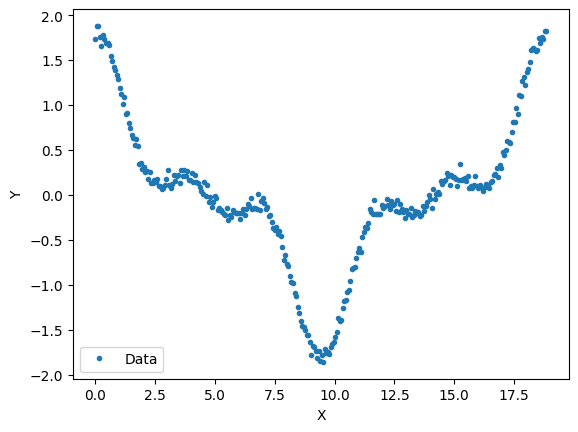

In [47]:
# Example
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, rcParamsDefault
rcParams.update(rcParamsDefault)

# define parameters for waves
x = np.linspace(0, 6*np.pi, 300)
dx = np.diff(x)[0]
P = x.max()
As = [1., 0.5, 0.3]

# help functions to create wave functions
def expwave(x, A, n):
    return A*np.exp(1.j * 2 * np.pi * n * x / P)

# Define function as sum of 3 waves plus noise
yexp = np.real(expwave(x, As[0], 1) + expwave(x, As[1], 3) + expwave(x, As[2], 5) +np.random.normal(0, 0.05, 300))

# plot things
plt.plot(x, yexp, '.', label = 'Data')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()


Let's compute the *k*-array. The wavenumber resolution is inversily propotional to the size of the domain of x. $\Delta k = 2\pi/P = 2\pi/(6\pi) = 0.333$. So the wavenumbers are *k* = $0, \pm 0.3333, \pm 2\cdot 0.3333,\dots, \pm 149\cdot 0.3333 $ 

Let's compute our Fourier coefficients using equations (B).

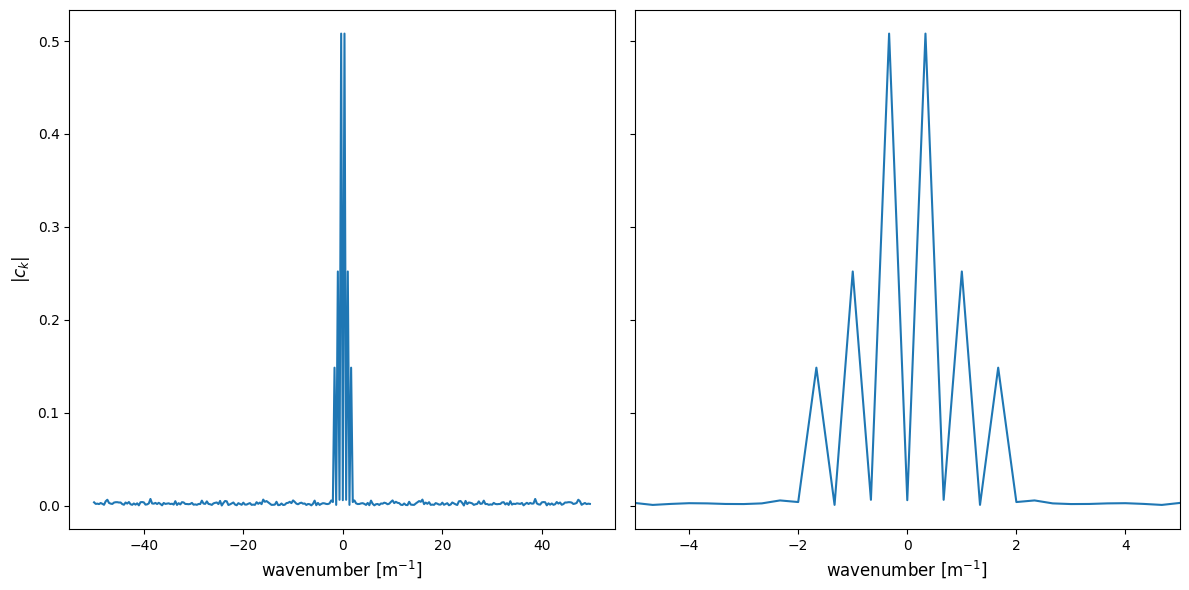

In [48]:
#compute the wavenumber sample size
dk = 2*np.pi/P #0.3333333

#make a list of wavenumbers 300 elements long.
klist= np.arange(-149*dk - dk, 148.5*dk + dk, dk)

# our DFT
def iDFT(y, k):
    N = len(y)
    x = np.linspace(0,P, N+1)[:-1]
    I = y*np.exp(-1.j * k * x)
    return (1/N)*np.sum(I)

cn = [iDFT(yexp, k) for k in klist]

fig, axs = plt.subplots(1,2, figsize=(12, 6), sharey=True)
ax = axs[0]
ax.plot(klist, np.abs(cn))
ax.set_ylabel(r'$|c_k$|', fontsize=12)
ax.set_xlabel('wavenumber [m$^{-1}$]', fontsize=12)
ax = axs[1]
ax.plot(klist, np.abs(cn))
ax.set_xlabel('wavenumber [m$^{-1}$]', fontsize=12)
ax.set_xlim(-5, 5)
fig.tight_layout()
plt.show()


As we can see from the left figure, the data noise is manifested as amplitude in higher wavenumbers, but the main three wavenumbers are clearly present, as seen in the right figure. The wavenumbers of the peaks are 0.333, 1.000, 1.667, which is consistent with $2\pi n /(6\pi) = 1/3, 3/3, 5/3 $ from when we generated the data. The reason we have negative wavenumbers is that our data was generated essentially as a sum of three cosine functions since we only kept the Real part of the the exponetial functions. From Euler's formula we have:
 $\cos(kx) = \frac{1}{2}(e^{ikx} + e^{-ikx})$, which also explains that the amplitude of the coefficients are half those used in generating the data.


## Plane Waves and the Wave Vector
Let's define a vector, the *wavevector* (or more specifically the *angular wavevector*), $\vec{k}$, which have the length, or size, given by the magnitude: $|\vec{k_n}| = k_n = \frac{2\pi}{\lambda} =\frac{2\pi n}{P} $, i.e the *wavenumber*. If we generalize the one-dimensional wave function above, then we can write it as:
1. $\qquad y(\vec{r},t) = A_0 \cos(\vec{k}\cdot \vec{r} - \omega t - \phi),$

where $\vec{k}\cdot \vec{r}$  is  dot product.

This equation gives us the value of our observable in a point in space, $\vec{r} = (x, y, z)$, given a wave propagating *in the direction of* $\vec{k}$. 

It is easy to see that at any given point in time the amplitude (for example the electric field) will be *constant* in any direction *normal* to $\vec{k}$, as the dot product between $\vec{k}$, and $\vec{r}$ will be zero for those points.

What this describes are so-called *plane waves*, which propagates in the direction of $\vec{k}$, with parallel sheets of wavefronts, spaced $\lambda = \frac{2\pi}{k}$ apart. 

In fact, equation 1. can be seen as the real part of an even more general complex wave function:
$$ y(\vec{r},t) = A_0 \cos(\vec{k}\cdot \vec{r} - \omega t - \phi) = Re\left[c e^{i(\vec{k}\cdot \vec{r} - \omega t)}\right]$$
where the phase and the amplitude are baked into the complex constant, *c*.

## k-space (reciprocal space)
The important realization is this:

All possible wavevectors, {$\vec{k}$}, form a collection of 1-, 2- or 3-valued tuples (depending on if we are working in one-, two- or three dimensions), for example (0, 0.5) or (0, 2, 1). This collection of tuples can be seen as points in a two- or three dimensional *k-space*.

Every point in k-space thus represents a planewave with a wavelength *inversely* propotional to the length of the k-vector, and which propagates in the direction of the k-vector. To that end it make sense to also refer to k-space as *reciprocal space*.

This means that we can somehow represent a wave, something which extends out infinitely far away in real space if it's undamped, with a single point in k-space. Likewise, since the amplitude of several waves simply add up, a superposition of several such waves can be represented as the sum of the individual wave's k-vector, that is the sum of points in k-space.

### A  note about plane waves in measurements
The reason we talk about plane waves is that both electromagnetic radiation, such as x-rays, and a beam of electrons or neutrons, all propagate as plane waves to a good approximation. This means that when we describe the interaction of these sources of radiation with matter, we will often write it in terms of plane waves where both direction *and* size is captured by the *k*-vector.


## Fourier Transforms

In experiments such as optics, diffractions and spectroscopy, it is very common that the observed signal can be treated as Fourier Transforms of the object properties being observed.
To that end we will go through a simple example of how to use [FFT functionalities in NumPy](https://numpy.org/doc/stable/reference/routines.fft.html#).

Let's look at a classic case of a square signal often used as a so called window function:

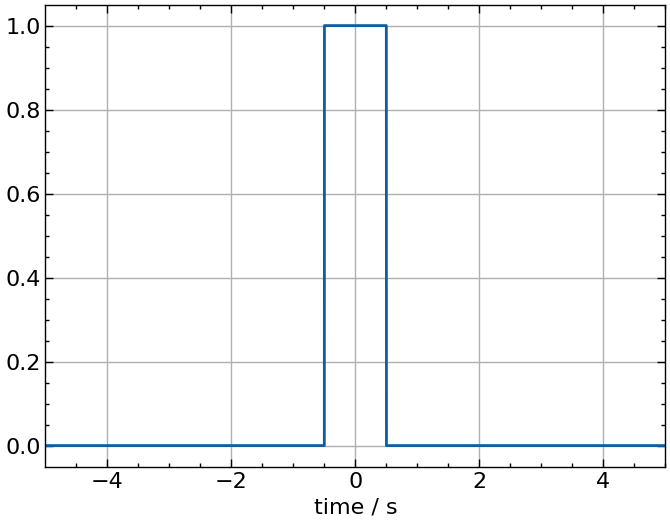

In [41]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 20000)
f = np.abs(x) < 1/2
f.astype(float)

plt.plot(x,f)
plt.xlim(-5., 5.)
plt.xlabel('time / s')
plt.grid()

plt.show()

Due to the way the FFT-function works the summation will sort the data in so-called “standard” order: If **A = fft(a, n)**, then **A[0]** contains the zero-frequency term (the sum of the signal), which is always purely real for real inputs. Then **A[1:n/2]** contains the positive-frequency terms, and **A[n/2+1:]** contains the negative-frequency terms, in order of decreasingly negative frequency.

So what does that mean? It means that if you try to plot the transformed data directly, it will look strange. So you need to re-arrange both frequencies and the data so that the data and the frequencies will start from the very "left". Or, depending on the symmetry, only plot one half of it.
Thankfully numpy.fft library includes two functions which will do this for you.

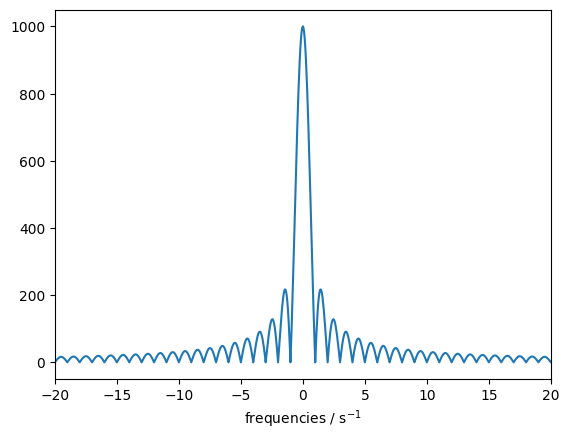

In [44]:
# The FFT generates a complexed valued array
F = np.fft.fft(f)

# In order to plot the fourier spectrum we need to shift F and the frequencies
# to start with negative frequencies and end with positive, centered around 0
F_freq = np.fft.fftfreq(len(x), np.diff(x)[0])
F = np.fft.fftshift(np.abs(F))
F_freq = np.fft.fftshift(F_freq)

plt.plot(F_freq, F)
plt.xlim(-20, 20)
plt.xlabel(r'frequencies / s$^{-1}$')
plt.show()

We can clearly see the $\sin(x)/x$ function we expected.

Let's reverse the process and compute the inverse FFT of our sinc(x) 

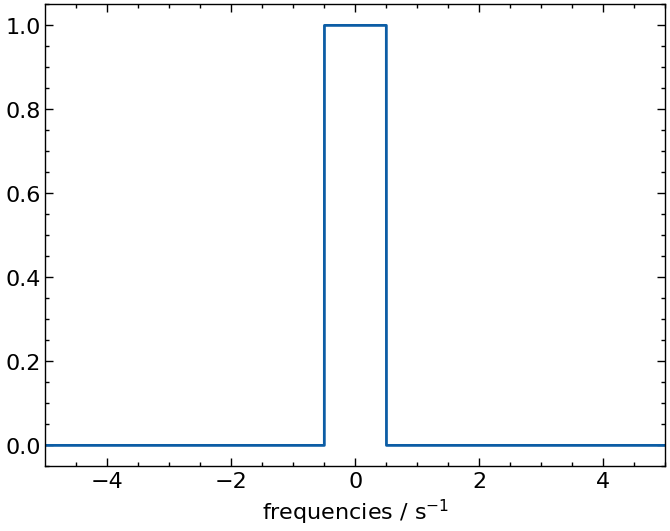

In [42]:
F = np.fft.fft(f)
f_inv = np.fft.ifft(F)

plt.plot(x, f_inv.real)
plt.xlim(-5, 5)
plt.xlabel(r'frequencies / s$^{-1}$')
plt.show()

By using numpy's Fast Fourier Transform library we can directly observe the connection between points in k-space and plane waves in real space.
We look att two individual plane waves and then the superposition of the two represented in k-space simply by the two points.

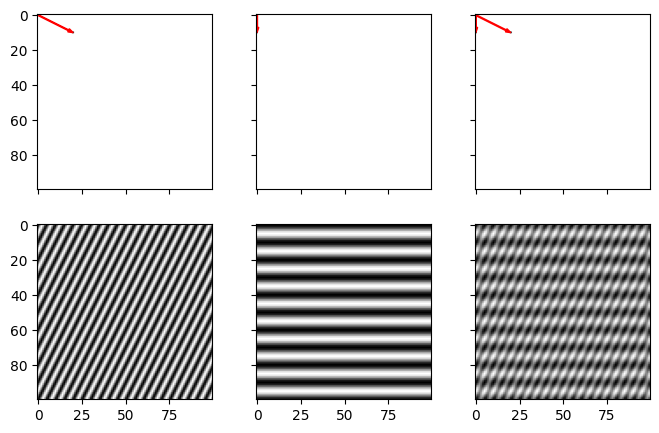

In [43]:
from numpy.fft import ifftn

rcParams.update(rcParamsDefault)
cmap = cm.binary

fig, ax = plt.subplots(2,3,figsize=(8,5), sharey='row', sharex='col')

im = np.zeros((100,100))
im[10,20 ] = 1

ax[0, 0].arrow(0, 0, 20, 10, width=0.5, head_width=2., length_includes_head=True, color='red')
ax[0, 0].imshow(im, cmap=cmap)
im_inv = ifftn(im).real
ax[1, 0].imshow(im_inv, cmap=cmap)

im = np.zeros((100,100))
im[10,0] = 1

ax[0, 1].imshow(im, cmap=cmap)
ax[0, 1].arrow(0, 0, 0, 10, width=0.5, head_width=2., length_includes_head=True, color='red')
im_inv = ifftn(im).real
ax[1, 1].imshow(im_inv,  cmap=cmap)

im = np.zeros((100,100))
im[10,20] = 1
im[10,0] = 1

ax[0, 2].imshow(im, cmap=cmap)
ax[0, 2].arrow(0, 0, 20, 10, width=0.5, head_width=2., length_includes_head=True, color='red')
ax[0, 2].arrow(0, 0, 0, 10, width=0.5, head_width=2., length_includes_head=True, color='red')
im_inv = ifftn(im).real
ax[1, 2].imshow(im_inv,  cmap=cmap)

plt.show()

In the left 2 figures above one can clearly see how the waves are propagating in the direction of the k-vector and that the wave-lengths are inversely proportional to the length of k. In the pictures to the right one can also see how the wave is a sum, or superposition, of the two previous waves.